In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.stats as norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Defing tickers and weights
tickers = ['AAPL','TSLA','MSFT']


In [3]:
# Downloading historical adjusted closeing price
data = yf.download(tickers, start="2022-01-01", end="2025-01-01")
data


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


Price            Close                                High              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2022-01-03  178.645630  325.038025  399.926666  179.499559  328.193734   
2022-01-04  176.378357  319.464569  383.196655  179.558473  325.474983   
2022-01-05  171.686707  307.201019  362.706665  176.839663  316.609890   
2022-01-06  168.820663  304.773560  354.899994  172.059668  309.453726   
2022-01-07  168.987534  304.928864  342.320007  170.921120  307.317484   
...                ...         ...         ...         ...         ...   
2024-12-24  257.578674  437.647369  462.279999  257.588630  437.916355   
2024-12-26  258.396667  436.432068  454.130005  259.474086  439.251246   
2024-12-27  254.974930  428.881104  431.660004  258.077462  433.553144   
2024-12-30  251.593094  423.202911  417.410004  252.889969  425.912495   
2024-12-31  249.817383  419.885681  403.839996  252.670501  425.095662   

Price                          Low                                Open  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2022-01-03  400.356659  174.425125  320.212216  378.679993  174.542902   
2022-01-04  402.666656  175.809076  316.658401  374.350006  179.254206   
2022-01-05  390.113342  171.411883  306.812630  360.336670  176.290017   
2022-01-06  362.666656  168.467317  302.452885  340.166656  169.507721   
2022-01-07  360.309998  167.868606  301.093452  336.666656  169.694226   
...                ...         ...         ...         ...         ...   
2024-12-24  462.779999  254.675658  432.527071  435.140015  254.875189   
2024-12-26  465.329987  257.010028  434.957756  451.019989  257.568678   
2024-12-27  450.000000  252.451019  424.717120  426.500000  257.209530   
2024-12-30  427.000000  250.146586  420.284140  415.750000  251.623020   
2024-12-31  427.929993  248.829760  419.048902  402.540009  251.832526   

Price                                  Volume                       
Ticker            MSFT        TSLA       AAPL      MSFT       TSLA  
Date                                                                
2022-01-03  325.620623  382.583344  104487900  28865100  103931400  
2022-01-04  325.115693  396.516663   99310400  32674300  100248300  
2022-01-05  316.405962  382.216675   94537600  40054300   80119800  
2022-01-06  304.064728  359.000000   96904000  39646100   90336600  
2022-01-07  305.035658  360.123322   86709100  32720000   84164700  
...                ...         ...        ...       ...        ...  
2024-12-24  432.985301  435.899994   23234700   7164500   59551800  
2024-12-26  437.398354  465.160004   27237100   8194200   76366400  
2024-12-27  432.935523  449.519989   42355300  18117700   82666800  
2024-12-30  424.428211  419.399994   35557500  13158700   64941000  
2024-12-31  424.468070  423.790009   39480700  13246500   76825100  

[753 rows x 15 columns]

In [4]:
print(data.columns.levels)

[['Close', 'High', 'Low', 'Open', 'Volume'], ['AAPL', 'MSFT', 'TSLA']]


In [5]:
# Extracting closing prices for all 3 stocks
price_data = data.xs('Close', axis=1, level=0)

print(price_data.head())


Ticker            AAPL        MSFT        TSLA
Date                                          
2022-01-03  178.645630  325.038025  399.926666
2022-01-04  176.378357  319.464569  383.196655
2022-01-05  171.686707  307.201019  362.706665
2022-01-06  168.820663  304.773560  354.899994
2022-01-07  168.987534  304.928864  342.320007


### Calculating daily returns

In [6]:
# Daily percentage returns
returns = price_data.pct_change().dropna()

print(returns.head())

Ticker          AAPL      MSFT      TSLA
Date                                    
2022-01-04 -0.012691 -0.017147 -0.041833
2022-01-05 -0.026600 -0.038388 -0.053471
2022-01-06 -0.016693 -0.007902 -0.021523
2022-01-07  0.000988  0.000510 -0.035447
2022-01-10  0.000116  0.000732  0.030342


 ### Assign Portfolio Weights for my portifolio as:

#### 40% AAPL

#### 30% MSFT

#### 30% TSLA

In [7]:
weights = [ 0.4, 0.3, 0.3]

#### Calculate Daily Returns the Portfolio

In [8]:
# Portfolio daily returns
portfolio_returns = (returns * weights).sum(axis=1)
print(portfolio_returns.head())

Date
2022-01-04   -0.022771
2022-01-05   -0.038198
2022-01-06   -0.015505
2022-01-07   -0.010086
2022-01-10    0.009369
dtype: float64


### Plot Growth of ₹1,00,000 Investment

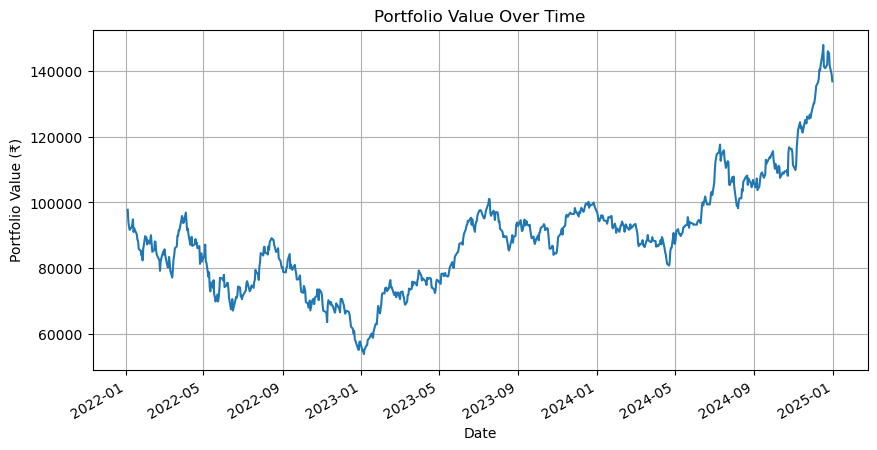

In [13]:
cumulative_returns = (1 + portfolio_returns).cumprod()

initial_investment = 100000
portfolio_value = cumulative_returns * initial_investment

# Plot
portfolio_value.plot(figsize=(10, 5), title="Portfolio Value Over Time")
plt.ylabel("Portfolio Value (₹)")
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\Portfolio Value Over Time.png', dpi=300, bbox_inches='tight')
plt.grid(True)
plt.show()


________________________________________________________________________________________________________________________________________________________
# Value at Risk (VaR) — Risk Measurement
##### Value at Risk (VaR) is a statistical measure used to assess the potential loss in the value of a portfolio over a defined period for a given confidence level.

##### “With X% confidence, the portfolio will not lose more than ₹Y in a given time frame.”

##### We evaluate 1-day VaR at 95% confidence level using three popular methods:
________________________________________________________________________________________________________________________________________________________
#### 1. Historical Method
##### Uses actual historical returns of the portfolio.

##### No assumptions about return distribution.

##### VaR is calculated as the 5th percentile (for 95% confidence) of past returns.

Formula:

VaR 
historical
​
 =Percentile 
5%
​
 (Returns)
________________________________________________________________________________________________________________________________________________________
#### 2. Parametric Method (Variance-Covariance)
##### Assumes returns are normally distributed.

##### Uses mean (μ) and standard deviation (σ) of portfolio returns.

##### More efficient but less accurate with non-normal data.

##### Formula:

VaR 
parametric
​
 =−(μ+z⋅σ)
Where:

𝜇
μ = mean daily return

𝜎
σ = standard deviation

𝑧
z = Z-score (e.g., -1.645 for 95% confidence)
________________________________________________________________________________________________________________________________________________________
## 3. Monte Carlo Simulation
##### Generates thousands of possible future return scenarios based on a normal distribution.

##### Captures uncertainty through simulation.

##### More computational but flexible.

##### Steps:

##### Simulate returns using 
𝑁
(
𝜇
,
𝜎
)
N(μ,σ)

##### Sort simulations

##### Take the 5th percentile
________________________________________________________________________________________________________________________________________________________

## VaR historical method

In [30]:
# setting confidence level to 95%
confidence_level = 0.95

In [31]:
# calculate the 5th percentage (5% that can go evrything wrong)
var_95 = np.percentile(portfolio_returns,(1-confidence_level)*100)
var_95


-0.03262011891320212

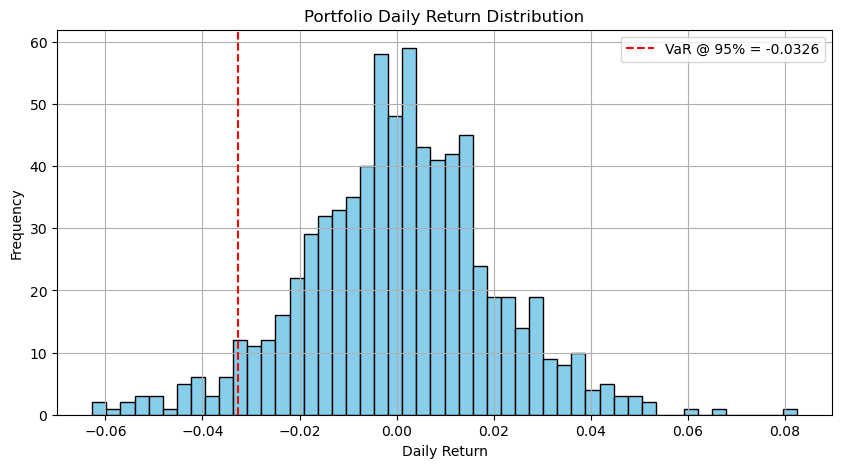

In [32]:
plt.figure(figsize=(10,5))
plt.hist(portfolio_returns, bins=50, color='skyblue', edgecolor='black')
plt.axvline(var_95, color='red', linestyle='--', label=f'VaR @ 95% = {var_95:.4f}')
plt.title("Portfolio Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\Portfolio_var_historical_method.png', dpi=300, bbox_inches='tight')

plt.show()

In [33]:
#  Calculating var for ₹100,000 investment
initial_investment = 100000
var_value = -var_95 * initial_investment  

print(f"1-day 95% Value at Risk: ₹{var_value:,.2f}")

1-day 95% Value at Risk: ₹3,262.01


###  Historical VaR Result

- **Confidence Level:** 95%
- **Portfolio Size:** ₹100,000
- **Calculated 1-Day VaR:** -3.26%
- **Interpreted as:**  
  > "There is a 95% probability that the portfolio will not incur a loss exceeding ₹3,262 in a single day."
________________________________________________________________________________________________________________________________________________________

##  Parametric Method (Variance-Covariance)

In [34]:
# Mean and standard deviation of portfolio returns
mean = portfolio_returns.mean()
std = portfolio_returns.std()

In [35]:
# Z-score for 95% confidence
z_score = stats.norm.ppf(1-confidence_level)

In [36]:
# parametric var
var_param = -(mean + z_score*std)
var_param

0.03172286347866152

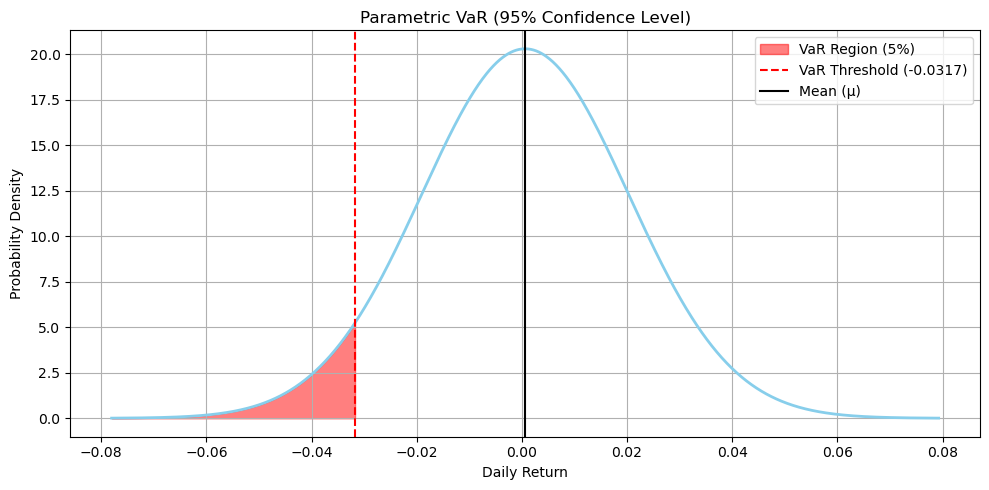

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plotting the normal distribution
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = norm.pdf(x, mean, std)
var_threshold = mean + z_score * std

plt.figure(figsize=(10, 5))
plt.plot(x, y, color='skyblue', lw=2)
plt.fill_between(x, y, where=(x < var_threshold), color='red', alpha=0.5, label='VaR Region (5%)')
plt.axvline(var_threshold, color='red', linestyle='--', label=f'VaR Threshold ({var_threshold:.4f})')
plt.axvline(mean, color='black', linestyle='-', label='Mean (μ)')

plt.title('Parametric VaR (95% Confidence Level)')
plt.xlabel('Daily Return')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\Portfolio parametric var.png', dpi=300, bbox_inches='tight')

plt.show()


In [38]:
# For initial investment 100,000
var_param_value = var_param* initial_investment
print(f"1-day 95% Parametric VaR: ₹{var_param_value:,.2f}")

1-day 95% Parametric VaR: ₹3,172.29


###  parametric VaR Result

- **Confidence Level:** 95%
- **Portfolio Size:** ₹100,000
- **Calculated 1-Day VaR:** -3.17%
- **Interpreted as:**  
  > "There is a 95% probability that the portfolio will not incur a loss exceeding ₹3,172 in a single day."
________________________________________________________________________________________________________________________________________________________

## Monte Carlo Simulation

In [39]:
# Number of simulations
n_simulations = 10000

In [40]:
# simulating future returns using normal distribution
simulated_returns = np.random.normal(mean,std,n_simulations)

In [41]:
# Calculating VaR from simulated distribution
var_mc = np.percentile(simulated_returns,(1-confidence_level)*100)
var_mc

-0.03205372582370181

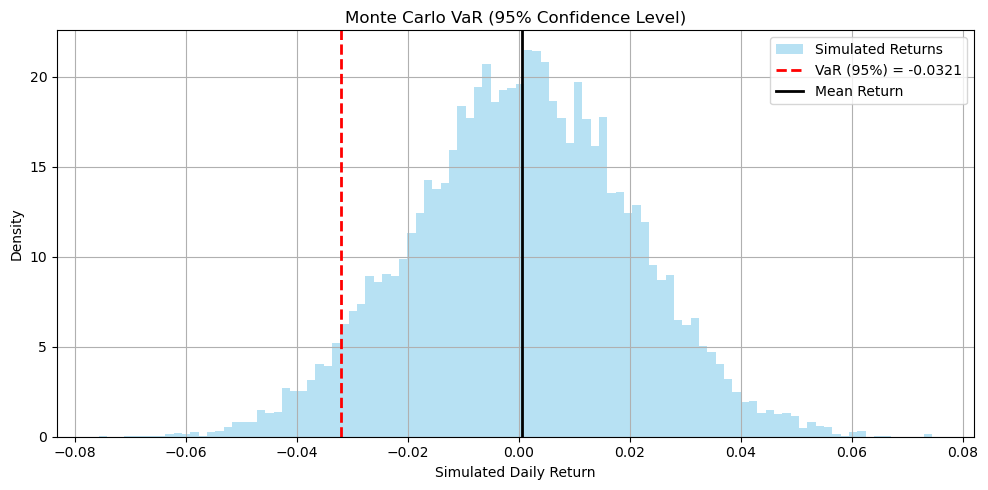

In [42]:


# Plot histogram of simulated returns
plt.figure(figsize=(10, 5))
plt.hist(simulated_returns, bins=100, density=True, color='skyblue', alpha=0.6, label='Simulated Returns')
plt.axvline(var_mc, color='red', linestyle='--', linewidth=2, label=f'VaR (95%) = {var_mc:.4f}')
plt.axvline(mean, color='black', linestyle='-', linewidth=2, label='Mean Return')
plt.title('Monte Carlo VaR (95% Confidence Level)')
plt.xlabel('Simulated Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\Portfolio monte carlo.png', dpi=300, bbox_inches='tight')

plt.show()

In [43]:
# For initial investment of 100,00 
var_mc_value = -var_mc* initial_investment
print(f"1-day 95% monte carlo var: ₹{var_mc_value:,.2f}")

1-day 95% monte carlo var: ₹3,205.37


###  Monte Carlo Simulation Result

- **Confidence Level:** 95%
- **Portfolio Size:** ₹100,000
- **Calculated 1-Day VaR:** -3.14%
- **Interpreted as:**  
  > "There is a 95% probability that the portfolio will not incur a loss exceeding ₹3,147 in a single day."

# Final comparison

In [44]:
print(f"1-Day 95% VaR Comparison")
print(f"------------------------")
print(f"Historical Method   : ₹{var_value:,.2f}")
print(f"Parametric Method   : ₹{var_param_value:,.2f}")
print(f"Monte Carlo Method  : ₹{var_mc_value:,.2f}")


1-Day 95% VaR Comparison
------------------------
Historical Method   : ₹3,262.01
Parametric Method   : ₹3,172.29
Monte Carlo Method  : ₹3,205.37


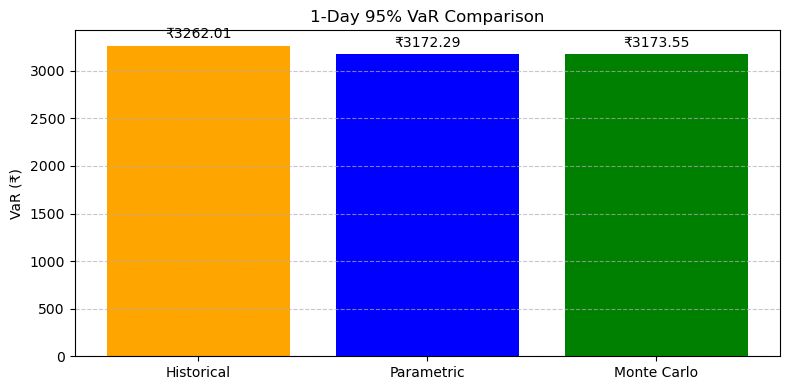

In [45]:
methods = ['Historical', 'Parametric', 'Monte Carlo']
values = [3262.01, 3172.29, 3173.55]

plt.figure(figsize=(8, 4))
bars = plt.bar(methods, values, color=['orange', 'blue', 'green'])
plt.title('1-Day 95% VaR Comparison')
plt.ylabel('VaR (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 50, f'₹{yval:.2f}', ha='center', va='bottom')
plt.savefig(r'C:\Users\amalm\OneDrive\Desktop\finamcial_data_analysis_lerning\project\value_at_risk\VaR comparison.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

## Summary: Portfolio Risk Assessment using Value at Risk (VaR)

In this project, we analyzed the potential daily risk of a ₹100,000 portfolio invested in AAPL, TSLA, and MSFT using three VaR methodologies:

- **Historical VaR** directly used past returns.
- **Parametric VaR** assumed a normal distribution of returns.
- **Monte Carlo VaR** simulated thousands of possible outcomes.

### Conclusion:
All three methods yielded similar risk estimates between ₹3,172 – ₹3,262 for a 1-day, 95% confidence level, implying there is a 5% chance of losing more than ~₹3,200 on a given day.

These results can be used to inform capital allocation, hedging decisions, or broader financial risk management strategies.


In [41]:
# Export your portfolio returns to CSV
portfolio_returns.to_csv(r"portfolio_daily_returns.csv")
